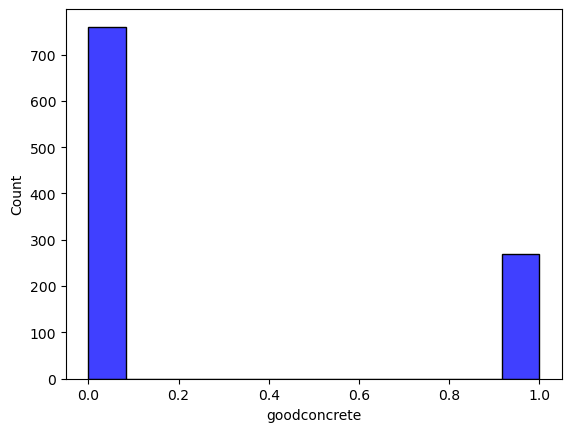

In [1]:
## Apr 1, 2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
df['goodconcrete']=(df.csMPa>45).astype(int)
sns.histplot(df['goodconcrete'], color='blue', kde=False)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

x_val = df.drop(['csMPa', 'goodconcrete'], axis=1)
y_val = df['goodconcrete']

X_train, X_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

good = y_pred == 1  # use 1 to represent good concrete
print("Good concrete (True/False):", good)

Accuracy: 0.7896440129449838
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       232
           1       0.59      0.49      0.54        77

    accuracy                           0.79       309
   macro avg       0.72      0.69      0.70       309
weighted avg       0.78      0.79      0.78       309

Good concrete (True/False): [ True  True  True  True False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False  True False  True  True  True
 False False False False False False False  True False False False False
 False False False  True False False False False False False False False
 False False False False  True  True  True False False  True False False
  True  True False False False False False  True False False False False
 False Fa

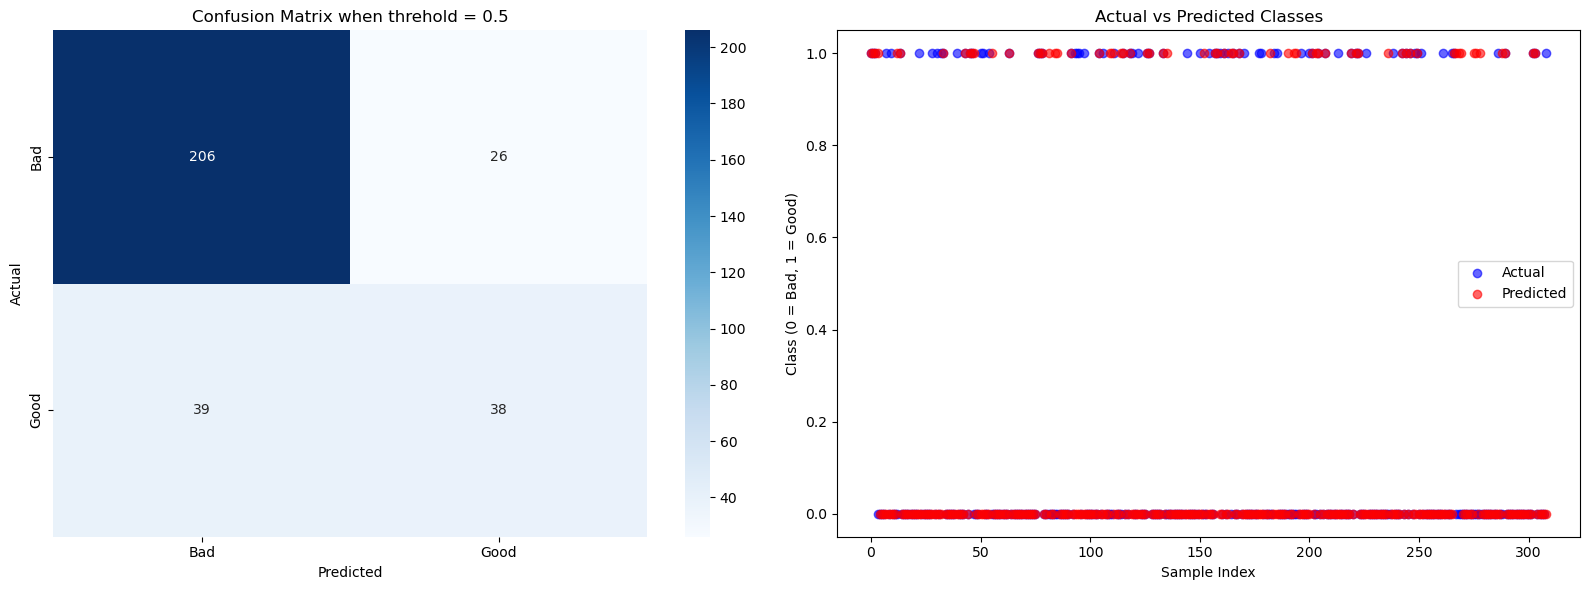

In [3]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix when threhold = 0.5')

axes[1].scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
axes[1].scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Class (0 = Bad, 1 = Good)')
axes[1].set_title('Actual vs Predicted Classes')
axes[1].legend()

plt.tight_layout()
plt.show()

In [4]:
model.predict(X_train)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [5]:
len(y_pred)

309

In [6]:
conf_matrix

array([[206,  26],
       [ 39,  38]])

In [7]:
normalized_conf_matrix =(conf_matrix / conf_matrix.sum()).round(2)
normalized_conf_matrix 

array([[0.67, 0.08],
       [0.13, 0.12]])

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


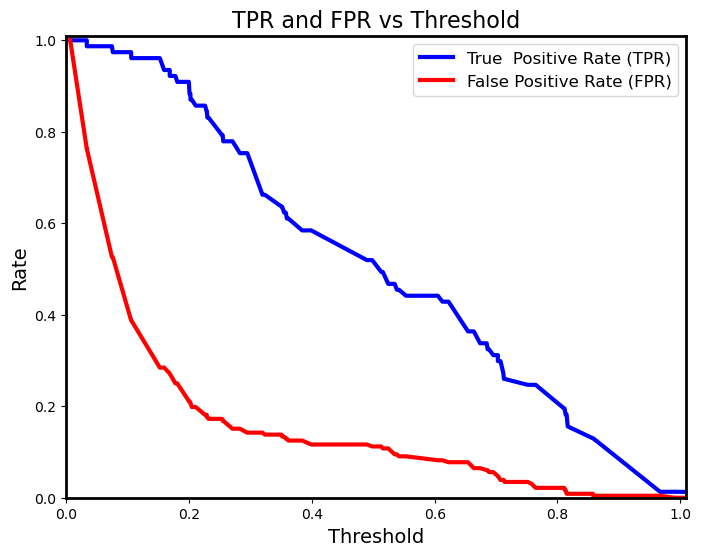

In [10]:
# plot TPR and FPR vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='True  Positive Rate (TPR)', color='b', linewidth=3)
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)', color='r', linewidth=3)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)  
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.xlabel('Threshold',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.title('TPR and FPR vs Threshold',fontsize=16)
plt.legend(fontsize=12)
plt.show()

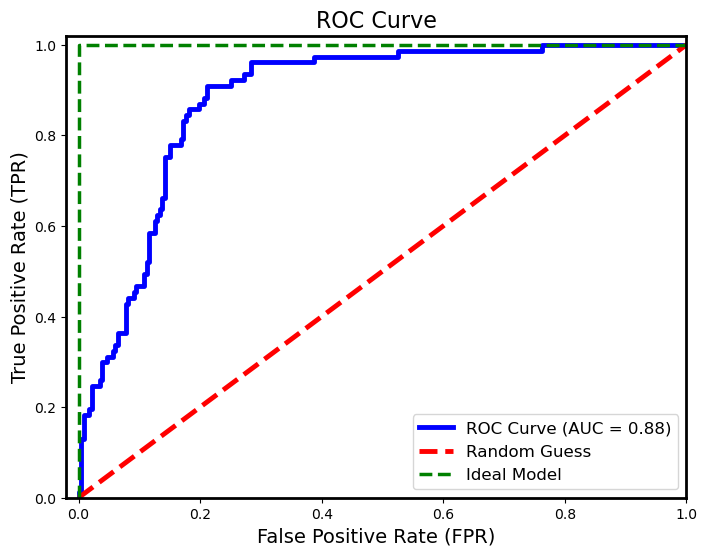

In [29]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=3.5)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess', linewidth=3.5)

# Ideal model line: perfect classification (vertical line then horizontal)
plt.plot([0, 0, 1], [0, 1, 1], color='green', linestyle='--', label='Ideal Model',linewidth=2.5)

plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [10]:
# implement a GPR for concrete date set
## Apr 10, 2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
# implement a decision tree for concrete date set
## Apr 15, 2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Mean Squared Error with Limited Depth: 2245.9882185538672


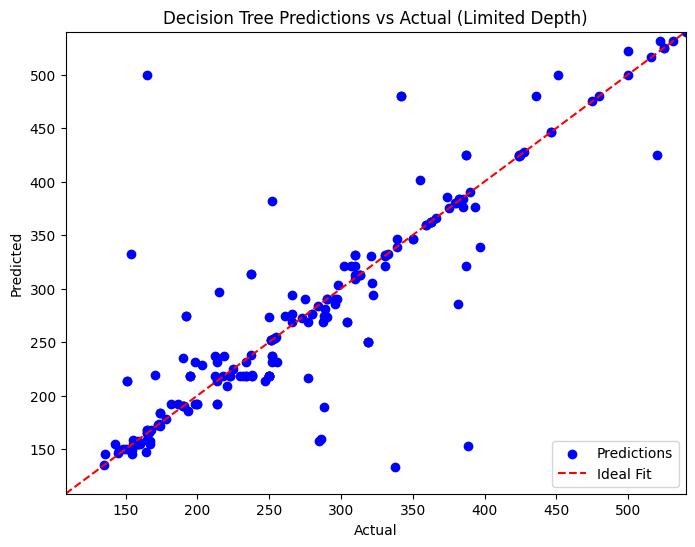

Depth of the Decision Tree (Limited): 10
|--- csMPa <= 54.03
|   |--- fineaggregate <= 613.60
|   |   |--- slag <= 72.50
|   |   |   |--- slag <= 23.75
|   |   |   |   |--- fineaggregate <= 603.50
|   |   |   |   |   |--- value: [475.00]
|   |   |   |   |--- fineaggregate >  603.50
|   |   |   |   |   |--- water <= 194.50
|   |   |   |   |   |   |--- water <= 181.00
|   |   |   |   |   |   |   |--- value: [540.00]
|   |   |   |   |   |   |--- water >  181.00
|   |   |   |   |   |   |   |--- value: [525.00]
|   |   |   |   |   |--- water >  194.50
|   |   |   |   |   |   |--- superplasticizer <= 1.50
|   |   |   |   |   |   |   |--- value: [500.00]
|   |   |   |   |   |   |--- superplasticizer >  1.50
|   |   |   |   |   |   |   |--- value: [500.10]
|   |   |   |--- slag >  23.75
|   |   |   |   |--- water <= 214.00
|   |   |   |   |   |--- value: [450.10]
|   |   |   |   |--- water >  214.00
|   |   |   |   |   |--- value: [427.50]
|   |   |--- slag >  72.50
|   |   |   |--- slag <= 19

In [33]:
# Initialize and train the Decision Tree Regressor with limited depth
dt_regressor_limited = DecisionTreeRegressor(max_depth=10, random_state=123456789)
dt_regressor_limited.fit(X_train, y_train)

# Make predictions
y_pred_limited = dt_regressor_limited.predict(X_test)

# Evaluate the model
mse_limited = mean_squared_error(y_test, y_pred_limited)
print("Mean Squared Error with Limited Depth:", mse_limited)

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_limited, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.title('Decision Tree Predictions vs Actual (Limited Depth)')
plt.legend()
plt.show()

tree_depth_limited = dt_regressor_limited.get_depth()
print("Depth of the Decision Tree (Limited):", tree_depth_limited)
tree_rules = export_text(dt_regressor, feature_names=list(X.columns))
print(tree_rules)

In [35]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [42]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 加載數據
X = df.drop(columns=['csMPa'])  # 特徵
y = df['csMPa']  # 目標

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 隨機森林
rf = RandomForestRegressor(n_estimators=15, max_features='sqrt', bootstrap=True, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))

# 極端隨機樹
et = ExtraTreesRegressor(n_estimators=15, max_features='sqrt', random_state=42)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
print("Extra Trees Mean Squared Error:", mean_squared_error(y_test, y_pred_et))

Random Forest Mean Squared Error: 34.967946361077054
Extra Trees Mean Squared Error: 40.979558193455595


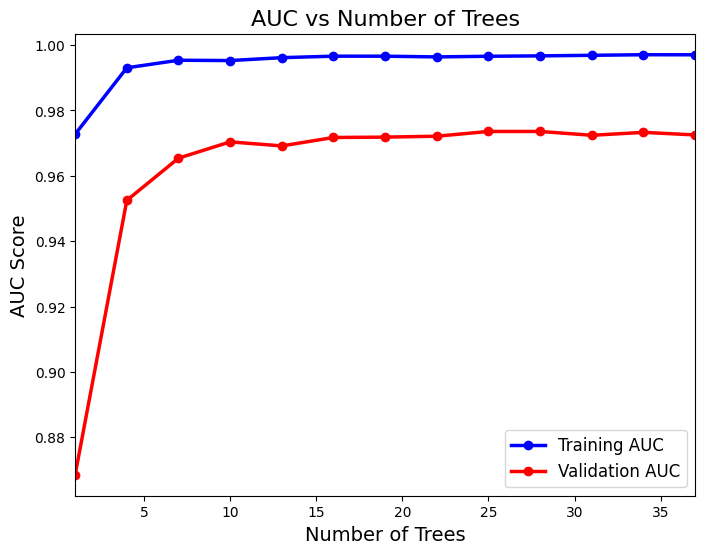

In [ ]:
from sklearn.metrics import roc_auc_score

# Define a range of tree counts to evaluate
tree_counts = list(range(1, 40, 3))

# Initialize lists to store AUC scores
train_auc_scores = []
val_auc_scores = []

# Loop through the tree counts
for n_trees in tree_counts:
    # Train a Random Forest model with the specified number of trees
    rf = RandomForestRegressor(n_estimators=n_trees, max_features='sqrt', bootstrap=True, random_state=15)
    rf.fit(X_train, y_train)
    
    # Predict probabilities for training and validation datasets
    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_test)
    
    # Compute AUC scores
    train_auc = roc_auc_score(y_train > 45, y_train_pred)  # Assuming threshold of 45 for "good concrete"
    val_auc = roc_auc_score(y_test > 45, y_val_pred)
    
    # Store the scores
    train_auc_scores.append(train_auc)
    val_auc_scores.append(val_auc)

# Plot the AUC scores as a function of the number of trees
plt.figure(figsize=(8, 6))
plt.plot(tree_counts, train_auc_scores, label='Training AUC', marker='o', color='blue',linewidth=2.5)
plt.plot(tree_counts, val_auc_scores, label='Validation AUC', marker='o', color='red',linewidth=2.5)
plt.xlim(min(tree_counts), max(tree_counts))
plt.xlabel('Number of Trees', fontsize=14)
plt.ylabel('AUC Score', fontsize=14)
plt.title('AUC vs Number of Trees', fontsize=16)
plt.legend(fontsize=12)
plt.show()